In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn tensorflow keras 

  Obtaining dependency information for pygments<3.0.0,>=2.13.0 from https://files.pythonhosted.org/packages/f7/3f/01c8b82017c199075f8f788d0d906b9ffbbc5a47dc9918a945e13d5a2bda/pygments-2.18.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 435.7 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.2 MB 762.6 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.2 MB 525.1 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.2 MB 1.0 MB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.2 MB 1.2 MB/s eta 0:00:01
   ---------------- ----------------------- 0.5/1.2 MB 1.7 MB/s eta 0:00:01
   --------------------- ------------------ 0.6/1.2 MB 1.9 MB/s eta 0:00:01
   ----------------------------- ---------- 0.9/1.2 MB 2.4 MB/s eta 0:00:01
   ----------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
metrics 0.3.3 requires Pygments==2.2.0, but you have pygments 2.18.0 which is incompatible.


In [ ]:
!pip install tensorflow

# Import Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense




# numpy and pandas: For numerical and data manipulation.
# matplotlib and seaborn: For data visualization.
# MinMaxScaler: Scales data to a range between 0 and 1.
# mean_squared_error: Metric to evaluate the model performance.
# tensorflow.keras: For building and training the LSTM model.

# Load and Prepare the Dataset

In [6]:
# Load the dataset
df = pd.read_csv(r'E:\GOOG.csv')

# Display the first few rows
print(df.head())



# pd.read_csv: Reads the CSV file containing stock price data.
# df.head(): Shows the first few rows of the dataset.

         Date      Open      High       Low     Close  Adj Close     Volume
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512


# Data Preprocessing

In [8]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# Select the 'Close' price for prediction
data = df[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape X to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)




# pd.to_datetime: Converts the Date column to datetime format.
# df.set_index: Sets the Date column as the index.
# MinMaxScaler: Scales the Close prices to a range of 0 to 1.
# create_dataset: Prepares the data for the LSTM model by creating sequences of time_step length.
# reshape: Reshapes the data to fit the LSTM input shape.

# Build and Train the LSTM Model

In [10]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Calculate performance metrics
mse = mean_squared_error(y_test[0], predictions)
print(f"Mean Squared Error: {mse}")




# train_size: Defines the split ratio for training and testing sets.
# Sequential(): Initializes the LSTM model.
# LSTM(): Adds LSTM layers to the model.
# Dense(): Adds a dense layer for output.
# compile(): Compiles the model with an optimizer and loss function.
# fit(): Trains the model with training data.
# predict(): Makes predictions with the test data.
# inverse_transform(): Converts the scaled predictions back to the original scale.
# mean_squared_error(): Calculates the mean squared error of the predictions.

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 18s 109ms/step - loss: 0.0029 - val_loss: 1.3672e-04
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 4.3797e-05 - val_loss: 1.6932e-04
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 4.3313e-05 - val_loss: 1.3275e-04
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 3.7530e-05 - val_loss: 1.9762e-04
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - loss: 3.8173e-05 - val_loss: 1.9736e-04
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 4.5040e-05 - val_loss: 1.1493e-04
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - loss: 3.4723e-05 - val_loss: 1.2787e-04
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 3.2144e-05 - val_loss: 1.0920e-04
Epoch 9/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 3.0518e-05 - val_loss: 1.9179e-04
Epoch 10/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 4.1946e-05 - val_loss: 1.0401e-04
Epoch 11/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 50m

# Visualize Results

# 1.  Scatter Plot

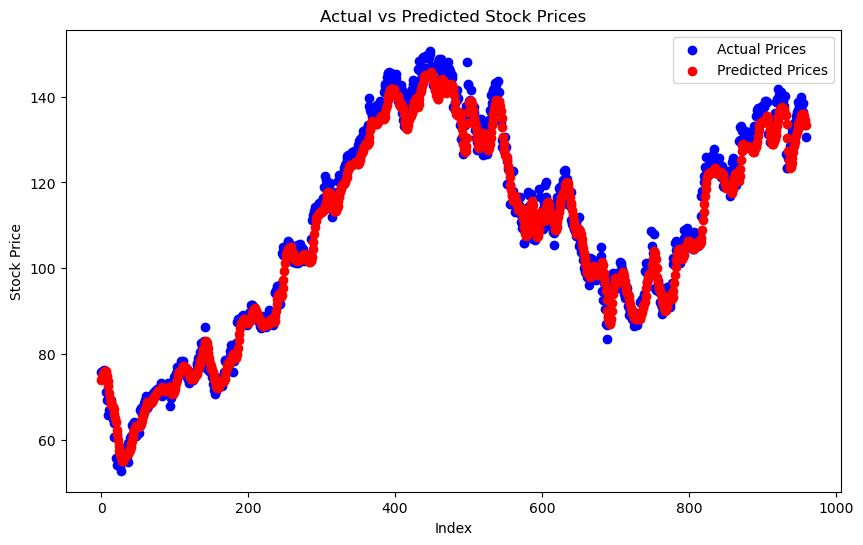

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test[0])), y_test[0], color='blue', label='Actual Prices')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


#  2. Bar Graph

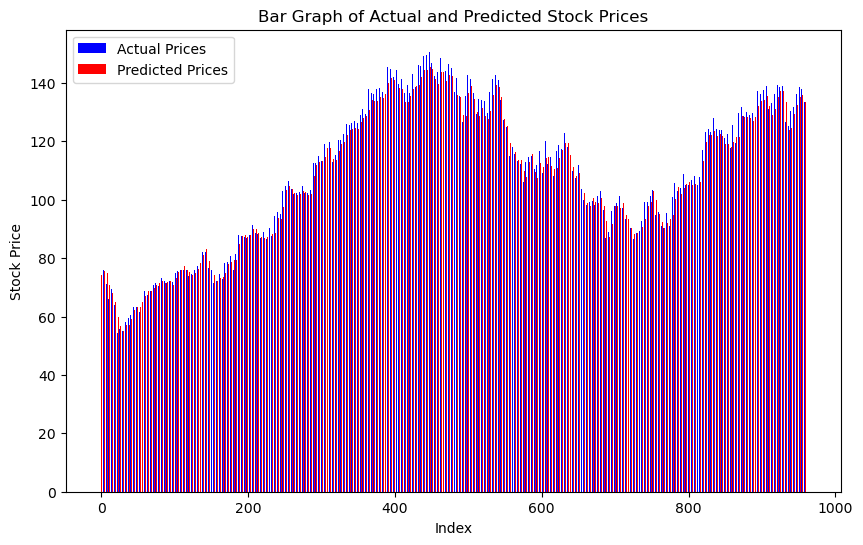

In [14]:
plt.figure(figsize=(10,6))
bar_width = 0.35
index = np.arange(len(y_test[0]))

plt.bar(index, y_test[0], bar_width, label='Actual Prices', color='blue')
plt.bar(index + bar_width, predictions.flatten(), bar_width, label='Predicted Prices', color='red')
plt.title('Bar Graph of Actual and Predicted Stock Prices')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# 3. Pie Chart

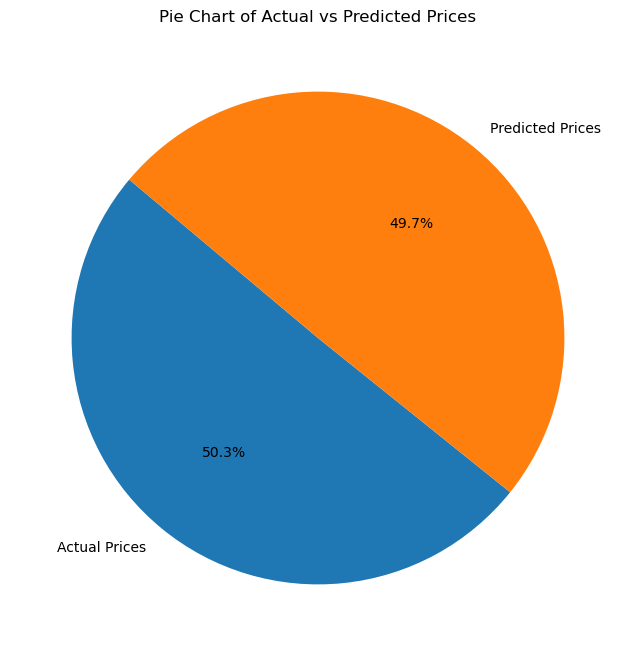

In [16]:
plt.figure(figsize=(8,8))
labels = ['Actual Prices', 'Predicted Prices']
sizes = [np.mean(y_test[0]), np.mean(predictions)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Actual vs Predicted Prices')
plt.show()




# Scatter Plot: Visualizes the actual vs predicted stock prices for comparison.
# Bar Graph: Shows actual and predicted prices in bar format.
# Pie Chart: Displays the proportion of average actual and predicted prices.